<a href="https://colab.research.google.com/github/NurudeenNajeem/Sentiment_Prediction/blob/main/FELLOWAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sentiment Analysis Prediction


The following are the steps required to create a text classification model in python.

1.  Importing Libraries
2.  Importing The dataset
3.  Text Preprocessing
4.  Converting Text to Numbers
5.  Training and Test Sets
6.  Training Text Classification Model and Predicting Sentiment
7.  Evaluating The Model
8.  Saving and Loading the Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
# !touch ~/.kaggle/kaggle.json


In [ ]:
# !mv .kaggle /root/


mv: cannot stat '.kaggle': No such file or directory


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!touch ~/.kaggle/kaggle.json

api_token  = {"username":"nurudeennajeem","key":"cdbb14e20619390fd56316e4027d69f4"}
import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /content/gdrive/My Drive/Kaggle. Or use the environment method.


In [ ]:
! unzip imdb-dataset-of-50k-movie-reviews

Archive:  imdb-dataset-of-50k-movie-reviews.zip
replace IMDB Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

LOAD THE DATASETS

In [ ]:
data = pd.read_csv("IMDB Dataset.csv")
data.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df =data.copy()

FIND THE MISSING VALUES

In [ ]:
data.isna().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


#*Preprocessing*
I have to change sentiment  column to numerical variables .i.e
positive : 1
negative : 0

In [ ]:
data['sentiment'] = [1 if i == "positive" else 0 for i in data.sentiment]
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


DATA CLEANING

In [ ]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["review"] = data["review"].apply(clean)

In [ ]:
data.head()

,review,sentiment
0,one review mention watch oz episod youll hook...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1


Spliting the dataset into features variable and target variable



In [ ]:
X=data['review']
y=data['sentiment']

##Finding TFIDF

Scikit-learn's TF-IDF Vectorizer (Term Frequency - Inverse Document Frequency) turns raw documents into a matrix of TF-IDF features. This process combines the CountVectorizer and TF-IDF Transformer.


In [ ]:
#FEATURE EXTRACTION
from sklearn.feature_extraction.text import TfidfVectorizer
# Feature extraction using TF-IDF
vectorize=TfidfVectorizer(max_features=2000)

Splitting dataset into training and testing


In [ ]:
SEED = 1
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=SEED)

##The above script divides data into 30% test set and 70% training set.



In [ ]:
#VECTORISE
X_train=vectorize.fit_transform(X_train)
X_test=vectorize.transform(X_test)

MULTINOMIAL NAVES BAYES

***italicized text***

In [ ]:
model_naive=MultinomialNB()
model_naive.fit(X_train,y_train)

MultinomialNB()

# Make predictions on the test set

In [ ]:
y_pred_naive=model_naive.predict(X_test)

##Accuracy
The following accuracy score on the test data shows how well our model Sklearn Multinimial Naive Bayes model has performed .



In [ ]:
multinomial_naive_bayes_accuracy=accuracy_score(y_test,y_pred_naive)
print("MultinomialNB :",round(multinomial_naive_bayes_accuracy,4))

MultinomialNB : 0.8447


The accuracy score for Multinomial Naves Bayes is 84%

## Instatiate the logistic regression model

In [ ]:
logis_reg= LogisticRegression()
logis_reg.fit(X_train,y_train)

LogisticRegression()

# Make predictions on the test set

In [ ]:
y_pred_logis_reg=logis_reg.predict(X_test)

## ACCURACY SCORE FOR LOGISTIC REGRESSION



The following accuracy score on the test data shows how well our  logistic regression model has performed for predicting sentiment.

In [ ]:
logistic_acc=accuracy_score(y_test,y_pred_logis_reg)
print("Logistic Regression :",round(logistic_acc,4))

Logistic Regression : 0.8781


The accuracy score for Logistic Regression is 88%

##*Support* Vector Machine

In [ ]:
model_SVC=SVC(max_iter=1000)
model_SVC.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=1000)

# Make predictions on the test set


In [ ]:
y_pred_SVC=model_SVC.predict(X_test)

## ACCURACY *SCORE FOR SUPPORT VECTOR MACHINE*

In [ ]:
acc_SVC=accuracy_score(y_test,y_pred_SVC)
print("Support Vector Machine :",round(acc_SVC,4))

Support Vector Machine : 0.7339


The accuracy score for Support Vector Machine is 73%

MULTI LAYER PERCEPTION NEURO

In [ ]:
#Instantiate the model
model_MLP=MLPClassifier(max_iter=500,hidden_layer_sizes=(100,))
model_MLP.fit(X_train,y_train)

MLPClassifier(max_iter=500)

# Make predictions on the test set


In [ ]:
y_pred_MLP=model_MLP.predict(X_test)

## ACCURACY SCORE FOR MPLCLASSIFIER

In [ ]:
acc_NN=accuracy_score(y_test,y_pred_MLP)
print("'MLPClassifier  :",round(acc_NN,4))

'MLPClassifier  : 0.8706


The accuracy score for MLPClassifier is 87%

In [ ]:
mlp_accuracy=accuracy_score(y_test,y_pred_MLP)
print("'MLPClassifier  :",round(mlp_accuracy,4))

'MLPClassifier  : 0.8706


Evaluating the Model


# Let's compare our model's results using a pandas

In [ ]:
# Let's compare our model's results using a pandas dataframe
models_result = [
    ["Logistic  Regression " , round(logistic_acc,2)],
    ["Multinomial Naive Bayes" , round(multinomial_naive_bayes_accuracy,2) ],
    ["suport Vector Machine" , round(acc_SVC,2)],
    ["MLP Classifier ", round(mlp_accuracy,2)]

]
results = pd.DataFrame(models_result, columns=["model",'accuracy'])
results

,model,accuracy
0,Logistic Regression,0.88
1,Multinomial Naive Bayes,0.84
2,suport Vector Machine,0.73
3,MLP Classifier,0.87


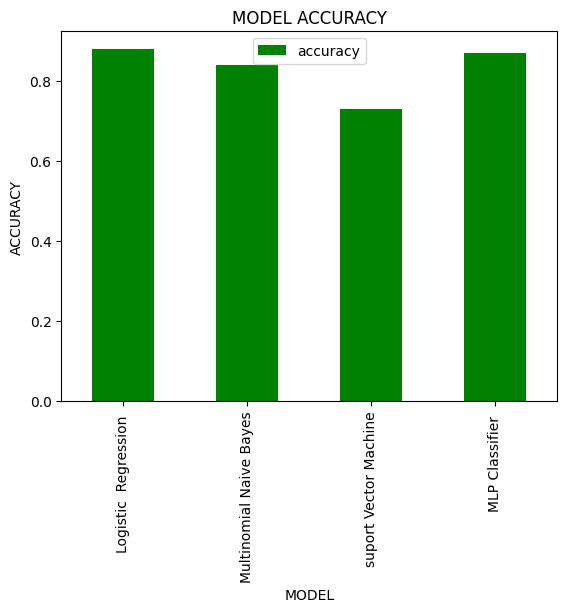

In [ ]:
#plt.plot(kind='bar', x="model", y="accuracy",data=results )
results.plot(kind='bar', x="model", y="accuracy", color ='g')
plt.xlabel("MODEL")
plt.ylabel("ACCURACY")
plt.title('MODEL ACCURACY')
plt.show();

We can see that the logistic regression has the
highest accuracy of 88% followed by MLPClassifier.





We can save our as a pickle

In [5]:
import pickle

In [6]:
with open ("sentiment_analysis", "wb") as picklefile:
  pickle.dump("sentiment_prediction", picklefile)